## We are assuming no eavesdropping here.

In [1]:
from qiskit import QuantumCircuit, execute, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from numpy.random import randint
from numpy import *
from qiskit.providers.aer import QasmSimulator
%matplotlib inline

C:\Users\User\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\User\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# BB84 Protocol

In [12]:
#Step-1: Binary String Generation
n = 72 #number of qubits

alice_basis = randint(2, size=n)
alice_state = randint(2, size=n)

print("Alice's State:\t", alice_state)
print("Alice's Bases:\t",alice_basis)

Alice's State:	 [0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0]
Alice's Bases:	 [0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0]


In [13]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bits[i] == 1: # Prepare qubit in Z-basis
                qc.x(0)
        if bases[i] == 0:
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

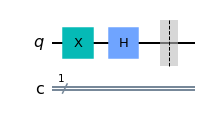

In [16]:
#Step-2: 
message = encode_message(alice_state, alice_basis)
message[3].draw("mpl")

In [5]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [6]:
## Step 3
bob_basis = randint(2, size=n)
print("Bob's Bases:\t",bob_basis)
bob_results = measure_message(message, bob_basis)

Bob's Bases:	 [0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]


In [7]:
print(bob_results)

[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]


In [8]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            good_bits.append(bits[q])
    return good_bits

In [9]:
## Step 4
shared_key = remove_garbage(alice_basis, bob_basis, alice_state)
print(shared_key)

[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]


# E91 Protocol

In [10]:
n = 500 #number of circuits
AliceBasis = [randint(3) for i in range(n)] 
BobBasis = [randint(3) for i in range(n)] 
CIRCUIT=[]
for i in range(n):
    qc= QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    #insert measurements
    CIRCUIT.append(qc)